<a href="https://colab.research.google.com/github/snorlaxoioi/iGarrr/blob/main/analisis_sentimen_dana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install google-play-scraper

In [29]:
from google_play_scraper import app

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
  'id.dana',
  lang ='id',
  country ='id',
  sort = Sort.MOST_RELEVANT,
  count=2000,
  filter_score_with=None
)

In [31]:
df_busu = pd.DataFrame (np.array (result), columns= ['review' ])

df_busu = df_busu.join(pd.DataFrame (df_busu.pop('review') . tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4602690b-0d48-404e-acc4-664bf60f6a97,alim endar,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat sangat sangat buruk! Selalu aja ada gan...,1,205,2.49.1,2024-01-07 22:07:39,"Hi Kak, Mohon maaf atas ketidaknyamanannya. Ag...",2024-01-07 22:11:03,2.49.1
1,37ae28c1-5c1d-4d66-9ccb-04bb21d068a4,Mboh Lali,https://play-lh.googleusercontent.com/a-/ALV-U...,"Sering mengalami gangguan, apalagi ketika peng...",1,567,2.49.1,2024-01-05 21:12:55,"Hi kak, Mohon maaf atas ketidaknyamanannya. Te...",2024-01-05 21:16:53,2.49.1
2,c69f590c-c44a-4bde-8694-5f8ef23dabd7,Surya Saputra,https://play-lh.googleusercontent.com/a/ACg8oc...,Tolong DANA diperbaiki lagi fiturnya. Saya sal...,4,1236,2.49.1,2024-01-03 04:30:26,None,NaT,2.49.1
3,e8a6f6bc-4460-44f1-bbe9-38fe23bce6c4,Abidah Fitra,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tidak bertanggung jawab. 2 kali kena, yang per...",1,403,2.49.1,2024-01-06 03:57:41,"Hi Kak Abidah, maaf ya atas kekhawatirannya. T...",2024-01-06 04:53:29,2.49.1
4,513954e2-6b6b-42c9-8e63-f69e6a34d39e,Qaz Ujm,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi transfer dan transaksi tercepat yang ...,1,1624,2.49.1,2023-12-27 16:11:55,"Hi Kak, Mohon maaf atas ketidaknyamanannya. Ag...",2023-12-28 21:46:09,2.49.1


In [32]:
len(df_busu.index)

2000

In [33]:
df_busu[['userName','score','at','replyContent']].head(10)

,userName,score,at,replyContent
0,alim endar,1,2024-01-07 22:07:39,"Hi Kak, Mohon maaf atas ketidaknyamanannya. Ag..."
1,Mboh Lali,1,2024-01-05 21:12:55,"Hi kak, Mohon maaf atas ketidaknyamanannya. Te..."
2,Surya Saputra,4,2024-01-03 04:30:26,None
3,Abidah Fitra,1,2024-01-06 03:57:41,"Hi Kak Abidah, maaf ya atas kekhawatirannya. T..."
4,Qaz Ujm,1,2023-12-27 16:11:55,"Hi Kak, Mohon maaf atas ketidaknyamanannya. Ag..."
5,Niko Handika,3,2023-12-28 01:17:18,"Hi Kak, maaf buat kamu khawatir. Yuk lakukan l..."
6,Swastika Pinca,1,2024-01-06 03:44:40,"Hi Kak Swastika, maaf udah bikin Kakak nggak t..."
7,Ata Candra R,1,2024-01-08 14:16:16,"Hi Kak, Kamu jgn khawatir yah. Terkait keluhan..."
8,mugi suwandi,1,2023-12-28 12:00:22,"Hai Kak, maaf ya atas kendala yg dialami. Terk..."
9,Muhammad Jaya Ma'ruf Nurosidin,1,2024-01-01 04:16:27,"Hi Kak Muhammad, maaf ya atas kendala yg kamu ..."


In [34]:
new_df = df_busu[['userName','score','at','replyContent']]
sorted_df = new_df.sort_values (by= 'at',ascending=False)
sorted_df.head()

,userName,score,at,replyContent
490,anggoroenggal cahyasaputra,1,2024-01-09 14:00:38,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar..."
358,Fantastic Wonderful Bright,1,2024-01-09 09:17:24,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar..."
690,Dea Yushi S,1,2024-01-09 07:31:29,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag..."
498,Dharma Ale ale,1,2024-01-09 07:29:27,"Hi Kak, harap berhati"" dgn pihak yg mengaku sb..."
636,Kamilia Nusafitri,1,2024-01-09 07:26:47,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag..."


In [35]:
my_df = sorted_df[['userName','score','at','replyContent']]

In [36]:
my_df=my_df[['score','replyContent']]

In [37]:
my_df.head()

,score,replyContent
490,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar..."
358,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar..."
690,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag..."
498,1,"Hi Kak, harap berhati"" dgn pihak yg mengaku sb..."
636,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag..."


In [39]:
def pelabelan(score):
  if score < 2:
    return 'Negatif'
  elif score == 3:
    return 'Netral'
  elif score == 4:
    return 'Positif'

my_df['Label'] =my_df['score'].apply(pelabelan)

my_df.head(58)

,score,replyContent,Label
490,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar...",Negatif
358,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar...",Negatif
690,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag...",Negatif
498,1,"Hi Kak, harap berhati"" dgn pihak yg mengaku sb...",Negatif
636,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag...",Negatif
486,1,"Hi Kak Jeje, maaf udah bikin kamu ga tenang, t...",Negatif
401,1,"Hi Kak Ira, maaf udah bikin kamu ga tenang, te...",Negatif
14,2,"Hi Kak Muhammad, maaf ya membuatmu cemas. Terk...",None
961,1,"Hai Kak, maaf ya buat kamu ga tenang. Terkait ...",Negatif
660,1,"Hi Kak, mohon maaf atas keluhan yang kamu alam...",Negatif


In [40]:
my_df.to_csv("scrapped_data.csv", index = False)

In [41]:
import pandas as pd
pd.set_option ('display.max_columns', None)
my_df = pd.read_csv ('/content/scrapped_data.csv')
my_df. head (58)

,score,replyContent,Label
0,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar...",Negatif
1,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar...",Negatif
2,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag...",Negatif
3,1,"Hi Kak, harap berhati"" dgn pihak yg mengaku sb...",Negatif
4,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag...",Negatif
5,1,"Hi Kak Jeje, maaf udah bikin kamu ga tenang, t...",Negatif
6,1,"Hi Kak Ira, maaf udah bikin kamu ga tenang, te...",Negatif
7,2,"Hi Kak Muhammad, maaf ya membuatmu cemas. Terk...",NaN
8,1,"Hai Kak, maaf ya buat kamu ga tenang. Terkait ...",Negatif
9,1,"Hi Kak, mohon maaf atas keluhan yang kamu alam...",Negatif


In [42]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   score         2000 non-null   int64 
 1   replyContent  1757 non-null   object
 2   Label         1646 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [43]:
my_df.isna()

,score,replyContent,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1995,False,False,True
1996,False,False,False
1997,False,False,False
1998,False,False,True


In [44]:
my_df.isna().any()

score           False
replyContent     True
Label            True
dtype: bool

In [46]:
my_df.describe()

,score
count,2000.000000
mean,1.677000
std,1.229401
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [47]:
my_df.isna().sum()

score             0
replyContent    243
Label           354
dtype: int64

In [49]:
my_df.dropna(subset=['Label'], inplace= True)

In [50]:
my_df.isnull().sum()

score             0
replyContent    173
Label             0
dtype: int64

In [52]:
my_df.head()

,score,replyContent,Label
0,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar...",Negatif
1,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar...",Negatif
2,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag...",Negatif
3,1,"Hi Kak, harap berhati"" dgn pihak yg mengaku sb...",Negatif
4,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag...",Negatif


In [53]:
my_df.to_csv("lanjutan_dana_data.csv", index = False)

In [54]:
# Mengimport package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('lanjutan_dana_data.csv')
df.head(20)

,score,replyContent,Label
0,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar...",Negatif
1,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar...",Negatif
2,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag...",Negatif
3,1,"Hi Kak, harap berhati"" dgn pihak yg mengaku sb...",Negatif
4,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag...",Negatif
5,1,"Hi Kak Jeje, maaf udah bikin kamu ga tenang, t...",Negatif
6,1,"Hi Kak Ira, maaf udah bikin kamu ga tenang, te...",Negatif
7,1,"Hai Kak, maaf ya buat kamu ga tenang. Terkait ...",Negatif
8,1,"Hi Kak, mohon maaf atas keluhan yang kamu alam...",Negatif
9,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag...",Negatif


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   score         1646 non-null   int64 
 1   replyContent  1473 non-null   object
 2   Label         1646 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.7+ KB


In [59]:
df.isna().sum()

score             0
replyContent    173
Label             0
dtype: int64

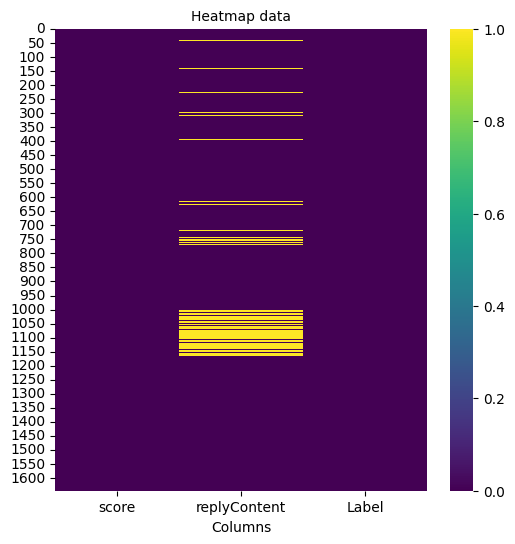

In [60]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isna(),cmap='viridis');
plt.title("Heatmap data",fontsize=10)
plt.xlabel("Columns",fontsize=10)
plt.show()

In [61]:
df.isna().sum()

score             0
replyContent    173
Label             0
dtype: int64

In [62]:
df.head()

,score,replyContent,Label
0,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar...",Negatif
1,1,"Hi Kak, maaf sudah bikin kamu gak nyaman. Agar...",Negatif
2,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag...",Negatif
3,1,"Hi Kak, harap berhati"" dgn pihak yg mengaku sb...",Negatif
4,1,"Hi Kak, mohon maaf atas ketidaknyamanannya. Ag...",Negatif


In [64]:
df.Label.value_counts()

Negatif    1410
Netral      161
Positif      75
Name: Label, dtype: int64

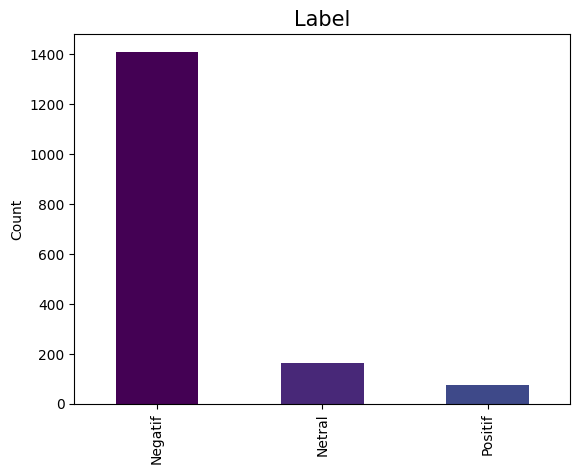

In [68]:
df.Label.value_counts().plot.bar(color = plt.cm.viridis(np.linspace(0,1,10)))
plt.title("Label",fontsize=15)
plt.ylabel("Count",fontsize=10)
plt.show()


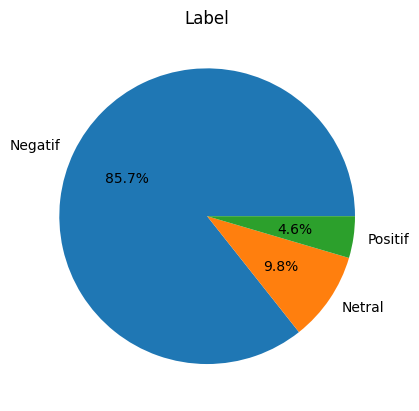

In [69]:
plt.title('Label')
plt.pie(df['Label'].value_counts(),labels=df['Label'].value_counts().index,autopct='%1.1f%%');

Pie chart digunakan untuk memvisualisasikan proporsi atau persentase dalam sebuah dataset. Terdapat 3 kategori sentiment yang disampaikan melalui google play store, yaitu Sentimen positive, negative, dan netral. Terlihat pada persentase tertinggi yaitu sentiment negative dengan persentase 85.7%, diikuti dengan sentiment netral pada persentase 9.8% dan positive dengan presentase terendah yaitu 4.6%

## **Preprosesing**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   score         1646 non-null   int64 
 1   replyContent  1473 non-null   object
 2   Label         1646 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.7+ KB


In [87]:
x = df.iloc[:, 2].values
y = df.iloc[:, 0].values


In [77]:
# Membagi dataset ke dalam Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [80]:
print(f"Jumlah x train {len(x_train)}")
print(f"Jumlah y train {len(y_train)}")
print(f"Jumlah x test {len(x_test)}")
print(f"Jumlah y test {len(y_test)}")

Jumlah x train 1234
Jumlah y train 1234
Jumlah x test 412
Jumlah y test 412


In [82]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [83]:
data_train = vect.transform(x_train)
data_test = vect.transform(x_test)

# Modelling

In [84]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 42)
model.fit(data_train, y_train)

SVC(random_state=42)

In [85]:
# Memprediksi hasil test set
prediction = model.predict(data_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 3,
       1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
accuracy_score(y_test, prediction)

1.0

In [90]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[351   0   0]
 [  0  48   0]
 [  0   0  13]]


In [91]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       351
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        13

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

